# Artificial Neuron: Pytorch, Linear Regression and Binary Classification

## 1 Introduction

This jupyter notebook guides you through the process of programming and training an artificial neuron using a python package called pytorch (https://pytorch.org/). Pytorch is a well-known and widely used framework to realize artificial neural networks in python. While a single artificial neuron can also be implemented using various more general frameworks like numpy or even python base libraries, pytorch will be used in this notebook to make you familiar with some of its basic concepts, which you will also need in subsequent, more complex practical sessions. 

In addition to programming an aritificial neuron, this notebook also presents two simple applications, which represent the two basic problems that can be solved by single aritifical neurons: linear regression and binary classification.
Hence, this notebook serves as a basic introduction to pytorch while simoultaneously deeping your understanding of the artificial neuron and its typical applications which were presented in the corresponding lecture. 

The notebook does not specify explicit tasks for you to do, instead it repeats some concepts from the lecture and helps you to transfer your new knowledge to application. Furthermore, it includes a lot of code snippets and parameters (which are always printed in UPPERCASE letters) that you can use, change, and play around with to better understand the artificial neuron, its application, and python implementations. Please feel free to experiment with this notebook. In case you break something you can always go back to moodle and retrieve the orginal version! 

## 1.1 General Idea

The general structure of this notebook contains the following parts:

    1. Introduction
        - Introduction, structure and imports 
        
    2. Data Generation and Visualization
        - Generation and visualization of sample data for linear regression and binary classification
        
    3. The Aritifical Neuron
        - Implementation of a general artificial neuron class using pytorch
    
    4. Linear Regression
        - Application of the aritifical neuron to the linear regression problem from section 2
        
    5. Binary classification
        - Application of the aritifical neuron to the binary classification problem from section 2

## 1.2 Imports

In [2]:
# General data handling
import numpy as np

# Pytorch
import torch # torch is the alias for pytorch 

# Some plotting libraries 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# A package for randomization
import random # Used to generate artificially noised data

ModuleNotFoundError: No module named 'numpy'

: 

## 2 Data Generation and Visualization

A sample data set for linear regression and binary classification is created in the following subsections. Section 2.1 deals with a data set for linear regression, whereas section 2.3 is dedicated to the creation of a binary classification data set. Both data sets are visualized in order to facilitate understanding of the problem domain (sections 2.2 and 2.3 respectively).  

### 2.1 Data Generation - Linear Regression

In the following code block, an artificial dataset for linear regression is generated. Feel free to fiddle with the generation parameters in order to generate different datasets and observe how changes in the input data affect the outcome of the linear regression later on.

In [ ]:
# Options for coefficients defining the original plane in which the training data lies
PLANE_COEFF_1 = -2
PLANE_COEFF_2 = -4
PLANE_COEFF_3 = 3

# Noise Amplitude
NOISE_AMP = 2

# Generate data in 3 dimensions that can be approximated by a plane
x1_data, x2_data = np.meshgrid(np.linspace(-5, 5, 6), np.linspace(-5, 5, 6))
y_hat_data = PLANE_COEFF_1 * x1_data + PLANE_COEFF_2 * x2_data + PLANE_COEFF_3

# Add noise to data
for i, value in np.ndenumerate(y_hat_data):
    y_hat_data[i] = value + random.uniform(-5,5)

# Vectorize x1, x2 and y_hat
x1_data = x1_data.flatten()
x2_data = x2_data.flatten()
y_hat_data = y_hat_data.flatten()

# Create Pytorch tensor
X_lin_reg = torch.zeros(len(x1_data),2, dtype=torch.float64)
X_lin_reg[:,0] = torch.tensor(x1_data)
X_lin_reg[:,1] = torch.tensor(x2_data)
y_hat_lin_reg = torch.tensor(y_hat_data)

# Remove temporary variables
del x1_data, x2_data, y_hat_data

: 

### 2.2 Data Visualization - Linear Regression

Before we go on to solve the regression task, a quick look at the regression dataset helps to understand the problem better. The following figure is a 3D figure of the problem space. You can rotate it using your mouse (drag while holding the left mouse button)

In [ ]:
%matplotlib notebook
# Plot the artificial dataset

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_lin_reg[:,0], X_lin_reg[:,1], y_hat_lin_reg, 'bo ')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3 / y_hat')

plt.show()

: 

As you can see from the figure, the sample data set contains data points that are roughly orientated along the plane that was used in Section 2.2. But even if we did not know that the data came from a plane that we defined explicitly, a look at the data reveals, that there is some kind of linear relationship between the x1, x2 and x3 coordinates of the data set.  To analyse this connection and hopefully find (or in this case reconstruct) a function x3 = f(x1, x2) is a regression task that can potentially be solved using linear regression. 

### 2.3 Data Generation - Binary Classification

Analog to the previous section, artificial training data for binary classification is generated. 

The training data is noisy and does contain two different groups or classes that can be linearly separated. Thus, the classes can potentially be discriminated by a binary classification approach using a single artificial neuron.

In [ ]:
# Data Generation Options
N_GROUP1 = 50 # Number of data points in group 1
N_GROUP2 = 50 # Number of data points in group 1

X1_BOUNDS_GROUP1 = [3, 5] # coordinate bounds for group 1
X2_BOUNDS_GROUP1 = [3, 5]
X3_BOUNDS_GROUP1 = [3, 5]

X1_BOUNDS_GROUP2 = [0, 2] # coordinate bounds for group 2
X2_BOUNDS_GROUP2 = [0, 2]
X3_BOUNDS_GROUP2 = [0, 2]

# Helper function to scale data to an interval [min, max]
def mapminmax(x, min, max):

    min_x = x.min()
    max_x = x.max()
    range_x = max_x-min_x

    return ((x-min_x)/(range_x))*(max-min)+min

# Define x1, x2, x3 datasets for two different groups of data
x1_group1_data = np.random.rand(N_GROUP1) # Generate random values between 0 and 1 for each dimension for group 1
x2_group1_data = np.random.rand(N_GROUP1)
x3_group1_data = np.random.rand(N_GROUP1)

x1_group2_data = np.random.rand(N_GROUP2) # Generate random values between 0 and 1 for each dimension for group 2
x2_group2_data = np.random.rand(N_GROUP2)
x3_group2_data = np.random.rand(N_GROUP2)

x1_group1_data = mapminmax(x1_group1_data, X1_BOUNDS_GROUP1[0], X1_BOUNDS_GROUP1[1]) # Scale each dimension group 1
x2_group1_data = mapminmax(x2_group1_data, X2_BOUNDS_GROUP1[0], X2_BOUNDS_GROUP1[1])
x3_group1_data = mapminmax(x3_group1_data, X3_BOUNDS_GROUP1[0], X3_BOUNDS_GROUP1[1])

x1_group2_data = mapminmax(x1_group2_data, X1_BOUNDS_GROUP2[0], X1_BOUNDS_GROUP2[1]) # Scale each dimension group 2
x2_group2_data = mapminmax(x2_group2_data, X2_BOUNDS_GROUP2[0], X2_BOUNDS_GROUP2[1])
x3_group2_data = mapminmax(x3_group2_data, X3_BOUNDS_GROUP2[0], X3_BOUNDS_GROUP2[1])

# Define class label datasets for group 1 and 2
labels_group1_data = np.ones(N_GROUP1)
labels_group2_data = np.zeros(N_GROUP2)

# Join datasets to form one big input dataset for the artificial neuron
x1_data = np.concatenate((x1_group1_data, x1_group2_data))
x2_data = np.concatenate((x2_group1_data,x2_group2_data))
x3_data = np.concatenate((x3_group1_data, x3_group2_data))
labels_data = np.concatenate((labels_group1_data, labels_group2_data))

# Create pytorch tensors
X_bin_class = torch.zeros(len(x1_data),3, dtype=torch.float64)
X_bin_class[:,0] = torch.tensor(x1_data)
X_bin_class[:,1] = torch.tensor(x2_data)
X_bin_class[:,2] = torch.tensor(x3_data)
labels_bin_class = torch.tensor(labels_data)

# Remove temporary variables
del x1_group1_data, x2_group1_data, x3_group1_data, x1_group2_data, x2_group2_data, x3_group2_data, labels_group1_data, labels_group2_data, x1_data, x2_data, x3_data, labels_data

: 

### 2.4 Data Visualization - Binary Classification

Again, a visualization of the data set helps to understand the problem domain better. Once more you can rotate the figure.

In [ ]:
# Plot resulting clusters
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_bin_class[:N_GROUP1,0], X_bin_class[:N_GROUP1,1], X_bin_class[:N_GROUP1,2], 'bo ')
ax.plot(X_bin_class[N_GROUP1:,0], X_bin_class[N_GROUP1:,1], X_bin_class[N_GROUP1:,2], 'ro')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

: 

The plot clearly shows two different classes of data in the data set. For each point of the input dataset, the input variables $x_1$, $x_2$, and $x_3$ are known. Furthermore, the labels data set, which is equivalent to $\hat{y}$, contains a clear labeling of the data point as either 0 or 1, depending on the class/cluster the data point stems from. To distinguish the two classes visually, the figure plots all labels 0 as blue dots and all labels 1 as red dots. 

Finding a classifier, which assigns the correct label (0 or 1) to points of this data set is a binary classification problem, since two classes that are potentially separable by a linear function shall be distinguished. Hence, solving this problem implicetely includes the construction of a linear separation (a plane) of the two data clouds.  

## 3 The Artificial Neuron

From the lecture corresponding to this notebook, you are familiar with linear regression and binary classification, which can both be solved by means of just one single artificial neuron. 

To solve the problems presented in Section 2, an artificial neuron shall be used. Before implementing such a neuron using python and pytorch, consider the following general descriptions of an artificial neuron (formula and computational graph). 

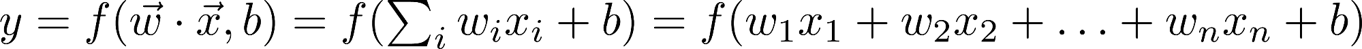

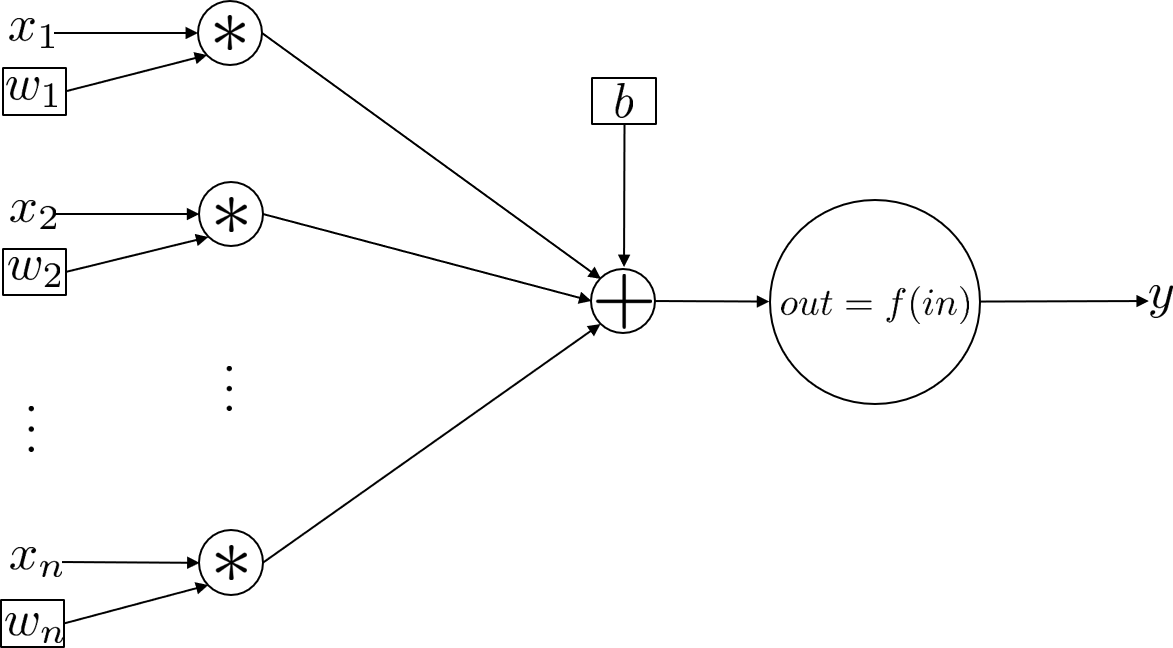

As you can see from both the formula and the computational graph, a general aritifical neuron comprises of multiple inputs ($x_1$ to $x_n$), which are multiplied with their corresponding weights ($w_1$ to $w_n$) as well as of a bias $b$ that is added to the sum of the weighted inputs, and finally an activation function $f$ that transforms the weighted sum into some neuron output $y$. 

From the lecture, you are also familiar with the concept of gradient descent, which can be used to update weights and biases of an artificial neuron in order to train the neuron to match expected outputs $\hat{y}$ on a training data set.
For this training process, the gradient of a loss Function $L$ has to be determined with respect to the weights and bias of the neuron.

The following code snippet implements an "ArtificialNeuron" class in python based on the above considerations and the following requirements: 

- The neuron shall be variable in terms of the number of inputs 
- The activation function of the neuron needs to be flexible such that different functions (e.g. linear, sigmoid, ..) can be realized
- A forward path or prediction has to be implemented based on the given formula
- Training of the neuron: 
    - .. shall be possible using gradient descent
    - .. is to be based on a customizable loss function
    - .. should return the loss of the current training step

In [ ]:
# Define the artificial neuron class including a gradient descent training process
class ArtificialNeuron:

    """Initialization of the Neuron.

    Parameters
    ----------
    
    num_features : int
        The number of inputs/input features of the neuron (n)
    act_func : callable
        The activation function f (e.g. sigmoid, linear, ...)
    grad_act_func : callable
        The gradient of the activation function with respect to its input (the weighted sum)
    loss_func : callable
        The loss function
    grad_loss_func : callable
        The gradient of the loss function with respect to y (dL/dy=f(y, y_hat))
    
    """
    def __init__(self, num_features, act_func, grad_act_func, loss_func, grad_loss_func):
        
        # Define number of inputs
        self.num_features = num_features
        
        # Initialize weights and bias as ones    
        self.weights = torch.ones(num_features, 1, dtype=torch.float64)
        self.bias = torch.ones(1, dtype=torch.float64)
        
        # Loss function
        self.loss_func = loss_func 
        self.grad_loss_func = grad_loss_func
        
        # Activation function
        self.act_func = act_func
        self.grad_act_func = grad_act_func
    
    
    
    """Return the weighted sum of inputs and bias.

    Parameters
    ----------
    
    x : torch.Tensor
        (Pytorch) Tensor containing the inputs
    
    Returns
    -------
    torch.Tensor
        (Pytorch) Tensor containing the weighted sum
    
    """
    def weightedSum(self, x):
        # Multiply weights bei inputs and add bias. @ is short for .matmul()
        return x @ self.weights + self.bias
    
    
    
    """Forward path through the artificial neuron.

    Parameters
    ----------
    
    x : torch.Tensor
        (Pytorch) Tensor containing the inputs
    
    Returns
    -------
    torch.Tensor
        (Pytorch) Tensor containing the neuron's activation
    
    """
    def forward(self, x):
        return self.act_func(self.weightedSum(x))
    
    
    
    """Prediction using the artificial neuron. Alias for self.forward(x)

    Parameters
    ----------
    
    x : torch.Tensor
        (Pytorch) Tensor containing the inputs
    
    Returns
    -------
    torch.Tensor
        (Pytorch) Tensor containing the neuron's activation
    
    """
    def predict(self, x):
        return self.forward(x)
    
    
    
    """Calculate the components of the gradient of L (dL/dw_i and dL/db) in preparation for gradient descent

    Parameters
    ----------
    
    x : torch.Tensor
        (Pytorch) Tensor containing the inputs
    y_hat : torch.Tensor
        (Pytorch) Tensor containing the inputs
    
    Returns
    -------
    torch.Tensor
        (Pytorch) Tensor containing the components of dL/dw_i
        
    torch.Tensor
        (Pytorch) Tensor containing dL/db
    
    """
    def gradL(self, x, y_hat):
        
        weightedSum = self.weightedSum(x)
        y = self.act_func(weightedSum)
    
        grad_loss = self.grad_loss_func(y, y_hat)
        
        # For further explanations regarding this formula consult the lecture slides!
        return self.grad_act_func(weightedSum) * grad_loss * x, self.grad_act_func(weightedSum) * grad_loss * 1

    
    """Update weights and bias of the neuron using gradient descent

    Parameters
    ----------
    
    gradL_w : torch.Tensor
        (Pytorch) Tensor containing the components of dL/dw_i
    gradL_b : torch.Tensor
        (Pytorch) Tensor containing dL/db
    alpha : float
        The learning rate
    
    """
    # update: 
    def update(self, gradL_w, gradL_b, alpha):
        self.weights = self.weights - alpha * gradL_w.reshape(self.num_features, 1)
        self.bias = self.bias - alpha * gradL_b

    
    
    """Perform one training step using a training sample (x, y_hat) to update weights and bias

    Parameters
    ----------
    
    x : torch.Tensor
        (Pytorch) Tensor containing the inputs
    y_hat : torch.Tensor
        (Pytorch) Tensor containing the expected output x_hat
    alpha : float
        The learning rate
        
    Returns
    -------
    torch.Tensor
        (Pytorch) Tensor containing the training loss for this sample after weight and bias update
    
    """
    def train(self, x, y_hat, alpha):
        
        # Calculate gradient
        gradL_w, gradL_b = self.gradL(x, y_hat)
        
        # Update weights and bias using gradient descent
        self.update(gradL_w, gradL_b, alpha)
        
        # Determine loss after weight/bias update
        loss = self.loss_func(self.forward(x), y_hat)
        
        return loss

: 

Make sure you understand the implementation of the aritifical neuron and its training routine before proceeding.

## 4 Linear Regression

In the following, an instance of the ArtificalNeuron class is used to solve the linear regression problem known from Section 2.1/2.2. 

First of all, a suitable activation function for linear regression as well as a loss function for the training process have to be defined. 

As known from the lecture, we can use a simple identity function $f(in)=in$ for linear regression problems. Its derivative, which is used for the calculation of the gradient of $L$ during the training process is $df/din = 1$.

While there are many different possible loss functions we will use the already familiar version $L = 0.5\cdot(y-\hat{y})^2$ since its derivative $dL/dy$ takes the very elegant form $dL/dy = y-\hat{y}=\Delta y$

In [ ]:
lin_act_func = lambda x: x
lin_grad_act_func = lambda x: 1

loss = lambda y, y_hat: 0.5*(y-y_hat)**2
grad_loss = lambda y, y_hat: y-y_hat

: 

With the loss and activation function at hand, an artificial neuron instance can easily be set up. Sections 2.1 and 2.2 clearly described the problem as a linear regression problem with two input features $x_1$ and $x_2$ and one regression variable $x_3$. Hence, two inputs to the artificial neuron are needed. 

In [ ]:
# Create neuron
neuron = ArtificialNeuron(2, lin_act_func, lin_grad_act_func, loss, grad_loss)

: 

Now the neuron can be trained using the training data. Please be aware that we would usually split the available data set into a training, a test, and a validation data set. Since this notebook serves to show the basics however, we will use all available data for training. Do not do this in real applications because it fosters overfitting and you will have no means to judge the quality of the training!  

In order to track the training progress, the training loss is recorded and printed later on.

In [ ]:
# Options
N_EPOCHS = 20

# Train neuron and track losses
epoch_list = list(range(0,N_EPOCHS))
loss_history = []

for e in epoch_list:
    losses = []
    for i, x in enumerate(X_lin_reg):
        losses.append(neuron.train(x, y_hat_lin_reg[i], 0.001))
    loss_history.append(sum(losses)/len(losses))

fig = plt.figure()
plt.plot(epoch_list, loss_history)
plt.xlabel("Epoch")
plt.ylabel("Mean Loss")

: 

The training loss gives a strong indication of the convergence of the training. For the default parameters given in this notebook, a convergence of the training loss can be observed indicating a successful training of the neuron on the training data set. 

The following code snippet visualizes the result of the neuron training by plotting a regression plane based on the obtained neuron weights and bias.

In [ ]:
%matplotlib notebook
# Calculated regression values
regression_y = neuron.weights[0] * X_lin_reg[:,0].reshape((6,6)) + neuron.weights[1] *  X_lin_reg[:,1].reshape((6,6)) + neuron.bias

# Plot regression result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_lin_reg[:,0], X_lin_reg[:,1], y_hat_lin_reg, 'bo ')
ax.plot_trisurf(X_lin_reg[:,0], X_lin_reg[:,1], regression_y.flatten(), color = 'r', cmap=None)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3 / y / y_hat')

plt.show()

: 

If the training was successful, you will see that the regression plane fits the data points neatly. Since we generated the noisy training data from a perfect plane in the first place we can also directly compare our results by comparing the neuron weights with the plane coefficients that we used in Section 2 to generate the data. In case of a successful training there should be only small differences between the generating plane and the trained plane.

To convince yourself that the training actually works you may want to reinitialize the neuron again and plot the regression plane without training the neuron first. You will see that the regression plane does not fit the data points well. You can also train the neuron with different learning rates, more or less epochs or different initializations of the neuron's weights and bias. For each setup, observe the differences in the training outcomes.

In [ ]:
# Comparing original data coefficients and trained weights / biases
print("Original Coefficients : ")
print("coeff1 = ", PLANE_COEFF_1)
print("coeff2 = ", PLANE_COEFF_2)
print("coeff3 = ", PLANE_COEFF_3)

print("\nTrained weights / bias : ")
print("w1 = ", neuron.weights[0])
print("w2 = ", neuron.weights[1])
print("b = ", neuron.bias)

: 

## 5 Binary Classification

In addition to linear regression, single artificial neurons can be applied to binary classification problems. A binary classification problem for testing purposes has been outlined in Sections 2.3 and 2.4. 
This activation problem shall now be solved using another instance of our "AritificalNeuron" class. 

Again, a suitable activation function has to be defined. Note that we will keep the loss function from the linear regression example.

As known from the lecture, we can use a sigmoid activation function $\sigma(in)=1/(1+exp(-in))$ for classification purposes. Again, we also have to define the gradient of our activation function, which can be expressed as $d\sigma(in)/din=\sigma(in)\cdot(1-\sigma(in))$.

In [ ]:
# Define activation function
sigmoid = torch.nn.Sigmoid()
grad_sigmoid = lambda x: sigmoid(x)*(1-sigmoid(x))

: 

With the loss and activation function at hand, an artificial neuron instance can easily be set up. Sections 2.3 and 2.4 clearly described the problem as a binary classification problem with three input features $x_1$, $x_2$, and $x_3$. For each data point a corresponding class label is available. Hence, three inputs to the artificial neuron are needed. 

In [ ]:
# Create neuron
neuron = ArtificialNeuron(3, sigmoid, grad_sigmoid, loss, grad_loss)

: 

The neuron can now be trained using the training data. Again, in contrast to best practices in real applications, no test or validation data set is generated for the sake of simplicity. 

In order to track the training progress, the training loss is recorded and printed later on. Once more, you are invited to play around with the number of epochs and have a look at the training process and outcome. You can also manipulate the training data set in Section 2.3. 

In [ ]:
# Options
N_EPOCHS = 300

# Train neuron and track losses
epoch_list = list(range(0,N_EPOCHS))
loss_history = []

for e in epoch_list:
    print("Training epoch {} of {}".format(e+1, N_EPOCHS))
    losses = []
    for i, x in enumerate(X_bin_class):
        losses.append(neuron.train(x, labels_bin_class[i], 0.01))
    loss_history.append(sum(losses)/len(losses))

: 

Below, the loss history is plotted. Observe how it converges with a growing number of epochs. 

In [ ]:
fig = plt.figure()
plt.plot(epoch_list, loss_history)
plt.xlabel("Epoch")
plt.ylabel("Mean Loss")

: 

The purpose of a classifier neuron is to give clear indications of the class a data point belongs to. This is why we used a sigmoid activation function with its very steep gradient around 0 and its asymptotic behavior towards 0 and 1. Nevertheless, it is always interesting to see where the neuron would actually be undecided between the two extreme outputs 0 and 1. For this example, a separating plane can be extracted from the neurons weights by searching for all points that would be classified as exactly in between the two classes (y=0.5).  This plane gives us an idea of the quality of separation between the classes (similar to SVM). It is plotted below. By going back and reintializing the neuron, you can also plot the initial plane of separation before training. Furthermore, you can test out different data set sizes or training lengths (epochs) to observe how the seperation plane is adjusted during the training process. 

In [ ]:
%matplotlib notebook
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_bin_class[:N_GROUP1,0], X_bin_class[:N_GROUP1,1], X_bin_class[:N_GROUP1,2], 'bo ')
ax.plot(X_bin_class[N_GROUP1:,0], X_bin_class[N_GROUP1:,1], X_bin_class[N_GROUP1:,2], 'ro')

# Plotting the class separating plane generated by the artifical neuron
surf_x1, surf_x2 = np.meshgrid(np.linspace(0, 5, 51), np.linspace(0, 5, 51))
surf_x3 = (0.5 - neuron.weights[0]*surf_x1.flatten() - neuron.weights[1] * surf_x2.flatten() - neuron.bias) / neuron.weights[2]
ax.plot_trisurf(surf_x1.flatten(), surf_x2.flatten(), surf_x3)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

: 

Finally, the trained neuron can be used to classify the data points. Since the first half of the data set comes from class 1 and the second half of the training data set belongs to class 0, we expect the output of the neuron to be close to 1 for the first half of the sample and close to 0 for the second half. 

In [ ]:
for x in X_bin_class: 
    print(neuron.predict(x))

: 